In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

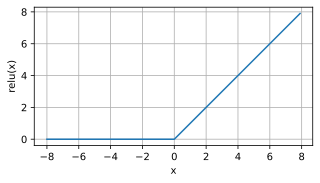

In [2]:
# x是一个从-8到8的数组，步长为0.1
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
# x.detach()和y.detach()用于获取不追踪梯度的数据，因为我们在这里只关心数据的值，而不是它们的梯度信息。
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

In [3]:
x

tensor([-8.0000, -7.9000, -7.8000, -7.7000, -7.6000, -7.5000, -7.4000, -7.3000,
        -7.2000, -7.1000, -7.0000, -6.9000, -6.8000, -6.7000, -6.6000, -6.5000,
        -6.4000, -6.3000, -6.2000, -6.1000, -6.0000, -5.9000, -5.8000, -5.7000,
        -5.6000, -5.5000, -5.4000, -5.3000, -5.2000, -5.1000, -5.0000, -4.9000,
        -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000, -4.2000, -4.1000,
        -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000, -3.4000, -3.3000,
        -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000,
        -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000,
        -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000, -1.0000, -0.9000,
        -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000, -0.2000, -0.1000,
         0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.90

In [4]:
y

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 

In [ ]:
# torch.ones_like(x)
# 创建一个与给定张量x形状相同的新张量，且该新张量中的所有元素值都设为1
# 对y进行反向传播，计算梯度
y.backward(torch.ones_like(x), retain_graph=True)
'''
在PyTorch中，当你调用y.backward()对非标量（即，包含多个元素的张量）进行梯度计算时，必须向backward()提供一个与y形状相同的张量作为参数。
这个参数在文档中被称为gradient，其作用是作为外部梯度，与y的梯度进行元素级别的乘法操作。

这样做的原因是，对于非标量的y，PyTorch无法直接计算出一个清晰的梯度值，因为梯度本质上是标量函数相对于某个变量的导数。
当函数返回多个值时（即函数是一个向量），你需要指定这些值如何共同影响最终的结果，
以便计算梯度。提供一个全1的张量作为gradient参数是一种告诉PyTorch如何将这些多个值合并成一个标量的方法，从而可以计算关于输入变量的梯度。

具体来说，当你执行y.backward(torch.ones_like(x))时，这个全1的张量实质上表示你对每个元素的损失都同等看待，每个元素对最终总损失的贡献是相等的。
这是在计算y（假设y是一个向量）关于x的梯度时，一种常见的假设或者说简化方式。

例如，假设y是一个向量，其中包含了多个损失值，你想要计算这些损失值相对于模型参数的总梯度。
在这种情况下，通过提供一个与y形状相同的全1张量给backward()，你可以告诉PyTorch将这些损失值相加（因为每个元素乘以1就是它本身），从而得到一个总损失，接着就可以计算这个总损失相对于模型参数的梯度了。

这意味着如果你的y是一个结果向量而不是单一值，你必须通过告诉PyTorch如何将这些值聚合为一个单一的标量来指导它进行梯度的计算。torch.ones_like(x)作为参数的使用就是这个目的的一种实现方式。
'''

d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))